In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
from keras import backend as K
np.random.seed(0)

Using TensorFlow backend.


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

def create_testdata(dataset, look_back = 1):
    dataX, dataY = [], []
    a = dataset[0:look_back, 0]
    dataX.append(a)
    dataY.append(dataset[look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
df = pd.read_csv("sp500.csv")
df['caldt'] = pd.to_datetime(df['caldt'], format = '%Y%m%d')
df['caldt'] =  df['caldt'].dt.strftime('%Y-%m-%d')
data = df['spindx'].values
data = data.astype('float32')
data = np.reshape(data,(-1,1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
pred = [] # at the end, append to prediction
testVal = []
num_hidden = 64
# Look back is how many lags do we want. so look back 1 in seq = (1 2 3 4 5) will produce (2 3 4 5 6)
df.head()

,caldt,vwretd,spindx,sprtrn
0,2009-06-01,0.025957,942.87,0.025818
1,2009-06-02,0.001893,944.74,0.001983
2,2009-06-03,-0.013036,931.76,-0.013739
3,2009-06-04,0.011331,942.46,0.011484
4,2009-06-05,-0.002298,940.09,-0.002515


In [0]:
epochs = 3
look_back=1
start = time.time()
for i in range(5,len(data)-look_back):
    #print(i)
    train, test = data[0:i,:], data[i:i+look_back+1,]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_testdata(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    model = Sequential()
    model.add(LSTM(num_hidden, input_shape = (look_back, 1)))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.fit(trainX, trainY, epochs = epochs, batch_size = 1, verbose = 1)
    testPredict = model.predict(testX)
    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    pred.append(testPredict)
    testVal.append(testY)
    K.clear_session()
    K.clear_session()
    if (i - 10) % 50 == 0:
      print('Saving pred so far...')
      np.save('pred_step1', np.asarray(pred))
end = time.time()

Epoch 1/3
3/3 [==============================] - 1s 286ms/step - loss: 5.4900e-04
Epoch 2/3
3/3 [==============================] - 0s 12ms/step - loss: 1.4118e-04
Epoch 3/3
3/3 [==============================] - 0s 24ms/step - loss: 2.3757e-05
Epoch 1/3
4/4 [==============================] - 1s 158ms/step - loss: 4.6531e-04
Epoch 2/3
4/4 [==============================] - 0s 7ms/step - loss: 9.1348e-05
Epoch 3/3
4/4 [==============================] - 0s 4ms/step - loss: 1.1249e-05
Epoch 1/3
5/5 [==============================] - 1s 122ms/step - loss: 3.1545e-04
Epoch 2/3
5/5 [==============================] - 0s 16ms/step - loss: 1.9456e-05
Epoch 3/3
5/5 [==============================] - 0s 8ms/step - loss: 5.6472e-05
Epoch 1/3
6/6 [==============================] - 1s 117ms/step - loss: 3.8582e-04
Epoch 2/3
6/6 [==============================] - 0s 6ms/step - loss: 1.9740e-05
Epoch 3/3
6/6 [==============================] - 0s 5ms/step - loss: 6.8484e-05
Epoch 1/3
7/7 [==============

36/36 [==============================] - 1s 17ms/step - loss: 1.0670e-04
Epoch 2/3
36/36 [==============================] - 0s 3ms/step - loss: 1.0733e-04
Epoch 3/3
36/36 [==============================] - 0s 4ms/step - loss: 8.8171e-05
Epoch 1/3
37/37 [==============================] - 1s 16ms/step - loss: 1.3074e-04
Epoch 2/3
37/37 [==============================] - 0s 3ms/step - loss: 1.0589e-04
Epoch 3/3
37/37 [==============================] - 0s 3ms/step - loss: 9.2626e-05
Epoch 1/3
38/38 [==============================] - 1s 17ms/step - loss: 1.2974e-04
Epoch 2/3
38/38 [==============================] - 0s 3ms/step - loss: 1.2380e-04
Epoch 3/3
38/38 [==============================] - 0s 3ms/step - loss: 1.1289e-04
Epoch 1/3
39/39 [==============================] - 1s 16ms/step - loss: 1.5457e-04
Epoch 2/3
39/39 [==============================] - 0s 3ms/step - loss: 1.2687e-04
Epoch 3/3
39/39 [==============================] - 0s 3ms/step - loss: 1.2294e-04
Epoch 1/3
40/40 [=====

69/69 [==============================] - 1s 9ms/step - loss: 4.7737e-04
Epoch 2/3
69/69 [==============================] - 0s 3ms/step - loss: 3.0315e-04
Epoch 3/3
69/69 [==============================] - 0s 3ms/step - loss: 2.4873e-04
Epoch 1/3
70/70 [==============================] - 1s 14ms/step - loss: 5.1373e-04
Epoch 2/3
70/70 [==============================] - 0s 3ms/step - loss: 3.4383e-04
Epoch 3/3
70/70 [==============================] - 0s 7ms/step - loss: 3.1830e-04
Epoch 1/3
71/71 [==============================] - 2s 34ms/step - loss: 5.5292e-04
Epoch 2/3
71/71 [==============================] - 1s 8ms/step - loss: 3.1497e-04
Epoch 3/3
71/71 [==============================] - 0s 5ms/step - loss: 2.7673e-04
Epoch 1/3
72/72 [==============================] - 1s 16ms/step - loss: 5.2586e-04
Epoch 2/3
72/72 [==============================] - 0s 5ms/step - loss: 3.3123e-04
Epoch 3/3
72/72 [==============================] - 0s 6ms/step - loss: 2.8350e-04
Epoch 1/3
73/73 [======

102/102 [==============================] - 1s 11ms/step - loss: 8.9489e-04
Epoch 2/3
102/102 [==============================] - 0s 5ms/step - loss: 5.5380e-04
Epoch 3/3
102/102 [==============================] - 0s 4ms/step - loss: 4.4424e-04
Epoch 1/3
103/103 [==============================] - 2s 17ms/step - loss: 9.4166e-04
Epoch 2/3
103/103 [==============================] - 1s 5ms/step - loss: 5.9030e-04
Epoch 3/3
103/103 [==============================] - 1s 5ms/step - loss: 4.3545e-04
Epoch 1/3
104/104 [==============================] - 1s 9ms/step - loss: 8.5853e-04
Epoch 2/3
104/104 [==============================] - 0s 3ms/step - loss: 5.3377e-04
Epoch 3/3
104/104 [==============================] - 0s 3ms/step - loss: 4.1615e-04
Epoch 1/3
105/105 [==============================] - 3s 27ms/step - loss: 7.1620e-04
Epoch 2/3
105/105 [==============================] - 1s 6ms/step - loss: 4.8782e-04
Epoch 3/3
105/105 [==============================] - 1s 8ms/step - loss: 3.5149e-04

134/134 [==============================] - 1s 6ms/step - loss: 8.9202e-04
Epoch 2/3
134/134 [==============================] - 0s 3ms/step - loss: 5.3143e-04
Epoch 3/3
134/134 [==============================] - 0s 3ms/step - loss: 3.2884e-04
Epoch 1/3
135/135 [==============================] - 1s 7ms/step - loss: 7.7326e-04
Epoch 2/3
135/135 [==============================] - 0s 3ms/step - loss: 5.4097e-04
Epoch 3/3
135/135 [==============================] - 0s 3ms/step - loss: 2.9976e-04
Epoch 1/3
136/136 [==============================] - 1s 7ms/step - loss: 8.4694e-04
Epoch 2/3
136/136 [==============================] - 0s 3ms/step - loss: 4.9478e-04
Epoch 3/3
136/136 [==============================] - 0s 3ms/step - loss: 2.9109e-04
Epoch 1/3
137/137 [==============================] - 1s 7ms/step - loss: 9.4183e-04
Epoch 2/3
137/137 [==============================] - 0s 3ms/step - loss: 5.3566e-04
Epoch 3/3
137/137 [==============================] - 0s 3ms/step - loss: 3.1813e-04
Ep

166/166 [==============================] - 1s 6ms/step - loss: 9.8008e-04
Epoch 2/3
166/166 [==============================] - 1s 3ms/step - loss: 4.5335e-04
Epoch 3/3
166/166 [==============================] - 1s 3ms/step - loss: 1.9980e-04
Epoch 1/3
167/167 [==============================] - 1s 8ms/step - loss: 9.7954e-04
Epoch 2/3
167/167 [==============================] - 0s 3ms/step - loss: 5.1461e-04
Epoch 3/3
167/167 [==============================] - 0s 3ms/step - loss: 2.2382e-04
Epoch 1/3
168/168 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 2/3
168/168 [==============================] - 0s 3ms/step - loss: 4.7714e-04
Epoch 3/3
168/168 [==============================] - 0s 3ms/step - loss: 2.2030e-04
Epoch 1/3
169/169 [==============================] - 1s 5ms/step - loss: 9.8787e-04
Epoch 2/3
169/169 [==============================] - 0s 3ms/step - loss: 4.9600e-04
Epoch 3/3
169/169 [==============================] - 0s 3ms/step - loss: 2.4436e-04A: 0s -

198/198 [==============================] - 1s 3ms/step - loss: 4.1438e-04
Epoch 3/3
198/198 [==============================] - 1s 3ms/step - loss: 1.4201e-04
Epoch 1/3
199/199 [==============================] - 1s 5ms/step - loss: 9.9265e-04
Epoch 2/3
199/199 [==============================] - 1s 3ms/step - loss: 4.5205e-04
Epoch 3/3
199/199 [==============================] - 1s 3ms/step - loss: 1.7632e-04
Epoch 1/3
200/200 [==============================] - 1s 5ms/step - loss: 9.2008e-04
Epoch 2/3
200/200 [==============================] - 1s 3ms/step - loss: 4.1339e-04
Epoch 3/3
200/200 [==============================] - 1s 3ms/step - loss: 1.3155e-04
Epoch 1/3
201/201 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 2/3
201/201 [==============================] - 1s 3ms/step - loss: 5.0680e-04
Epoch 3/3
201/201 [==============================] - 1s 3ms/step - loss: 1.8500e-04
Epoch 1/3
202/202 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 2/3


230/230 [==============================] - 1s 3ms/step - loss: 1.5894e-04
Epoch 1/3
231/231 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 2/3
231/231 [==============================] - 1s 3ms/step - loss: 4.2768e-04
Epoch 3/3
231/231 [==============================] - 1s 3ms/step - loss: 9.8480e-05
Epoch 1/3
232/232 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 2/3
232/232 [==============================] - 1s 3ms/step - loss: 5.2646e-04
Epoch 3/3
232/232 [==============================] - 1s 3ms/step - loss: 1.3829e-04
Epoch 1/3
233/233 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 2/3
233/233 [==============================] - 1s 3ms/step - loss: 3.9194e-04
Epoch 3/3
233/233 [==============================] - 1s 3ms/step - loss: 8.3943e-05
Epoch 1/3
234/234 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 2/3
234/234 [==============================] - 1s 3ms/step - loss: 5.5795e-04
Epoch 3/3
234/234 

263/263 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 2/3
263/263 [==============================] - 1s 3ms/step - loss: 4.7910e-04
Epoch 3/3
263/263 [==============================] - 1s 3ms/step - loss: 1.3196e-04
Epoch 1/3
264/264 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 2/3
264/264 [==============================] - 1s 3ms/step - loss: 5.1100e-04
Epoch 3/3
264/264 [==============================] - 1s 3ms/step - loss: 1.3253e-04
Epoch 1/3
265/265 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 2/3
265/265 [==============================] - 1s 3ms/step - loss: 4.3531e-04
Epoch 3/3
265/265 [==============================] - 1s 3ms/step - loss: 1.1561e-04
Epoch 1/3
266/266 [==============================] - 1s 5ms/step - loss: 8.5048e-04
Epoch 2/3
266/266 [==============================] - 1s 3ms/step - loss: 2.7212e-04
Epoch 3/3
266/266 [==============================] - 1s 3ms/step - loss: 5.3693e-05
Epoch 1/3
267/

295/295 [==============================] - 1s 4ms/step - loss: 8.6626e-04
Epoch 2/3
295/295 [==============================] - 1s 3ms/step - loss: 2.7536e-04
Epoch 3/3
295/295 [==============================] - 1s 3ms/step - loss: 6.5439e-05
Epoch 1/3
296/296 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 2/3
296/296 [==============================] - 1s 3ms/step - loss: 2.9748e-04A: 0s - loss: 3.
Epoch 3/3
296/296 [==============================] - 1s 3ms/step - loss: 6.7006e-05A: 0s - loss:
Epoch 1/3
297/297 [==============================] - 1s 4ms/step - loss: 9.2595e-04
Epoch 2/3
297/297 [==============================] - 1s 3ms/step - loss: 2.8142e-04A: 0s - loss
Epoch 3/3
297/297 [==============================] - 1s 3ms/step - loss: 5.2410e-05
Epoch 1/3
298/298 [==============================] - 1s 4ms/step - loss: 9.8983e-04
Epoch 2/3
298/298 [==============================] - 1s 3ms/step - loss: 3.4420e-04
Epoch 3/3
298/298 [==============================

326/326 [==============================] - 1s 4ms/step - loss: 8.8552e-04
Epoch 2/3
326/326 [==============================] - 1s 2ms/step - loss: 2.8616e-04
Epoch 3/3
326/326 [==============================] - 1s 2ms/step - loss: 6.2104e-05
Epoch 1/3
327/327 [==============================] - 1s 4ms/step - loss: 8.5904e-04
Epoch 2/3
327/327 [==============================] - 1s 3ms/step - loss: 2.3890e-04
Epoch 3/3
327/327 [==============================] - 1s 2ms/step - loss: 5.2992e-05
Epoch 1/3
328/328 [==============================] - 1s 4ms/step - loss: 7.8778e-04
Epoch 2/3
328/328 [==============================] - 1s 3ms/step - loss: 1.9234e-04A: 0s - lo
Epoch 3/3
328/328 [==============================] - 1s 2ms/step - loss: 4.0693e-05
Epoch 1/3
329/329 [==============================] - 1s 4ms/step - loss: 8.3557e-04
Epoch 2/3
329/329 [==============================] - 1s 2ms/step - loss: 2.5196e-04
Epoch 3/3
329/329 [==============================] - 1s 3ms/step - loss: 5.3

358/358 [==============================] - 1s 3ms/step - loss: 2.2952e-04
Epoch 3/3
358/358 [==============================] - 1s 2ms/step - loss: 4.9716e-05A: 0s - loss: 
Saving pred so far...
Epoch 1/3
359/359 [==============================] - 2s 4ms/step - loss: 8.6743e-04s - loss: 
Epoch 2/3
359/359 [==============================] - 1s 3ms/step - loss: 1.9539e-04
Epoch 3/3
359/359 [==============================] - 1s 3ms/step - loss: 3.8711e-05
Epoch 1/3
360/360 [==============================] - 1s 4ms/step - loss: 8.0647e-04
Epoch 2/3
360/360 [==============================] - 1s 2ms/step - loss: 2.1035e-04
Epoch 3/3
360/360 [==============================] - 1s 3ms/step - loss: 4.6449e-05
Epoch 1/3
361/361 [==============================] - 1s 4ms/step - loss: 7.8307e-04A: 0s - loss: 8.2829e
Epoch 2/3
361/361 [==============================] - 1s 2ms/step - loss: 1.6564e-04
Epoch 3/3
361/361 [==============================] - 1s 3ms/step - loss: 4.0300e-05A: 0s - loss: 4.0442

389/389 [==============================] - 1s 2ms/step - loss: 3.8590e-05A: 0s - loss: 4.13
Epoch 1/3
390/390 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 2/3
390/390 [==============================] - 1s 3ms/step - loss: 2.5965e-04
Epoch 3/3
390/390 [==============================] - 1s 3ms/step - loss: 4.1578e-05
Epoch 1/3
391/391 [==============================] - 1s 4ms/step - loss: 7.9619e-04
Epoch 2/3
391/391 [==============================] - 1s 2ms/step - loss: 1.7377e-04
Epoch 3/3
391/391 [==============================] - 1s 3ms/step - loss: 3.7200e-05
Epoch 1/3
392/392 [==============================] - 2s 4ms/step - loss: 9.3762e-04
Epoch 2/3
392/392 [==============================] - 1s 3ms/step - loss: 2.0807e-04
Epoch 3/3
392/392 [==============================] - 1s 2ms/step - loss: 3.8517e-05
Epoch 1/3
393/393 [==============================] - 1s 4ms/step - loss: 9.2093e-04
Epoch 2/3
393/393 [==============================] - 1s 2ms/step - loss:

421/421 [==============================] - 1s 3ms/step - loss: 1.6718e-04
Epoch 3/3
421/421 [==============================] - 1s 2ms/step - loss: 3.3812e-05
Epoch 1/3
422/422 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 2/3
422/422 [==============================] - 1s 3ms/step - loss: 2.0153e-04
Epoch 3/3
422/422 [==============================] - 1s 3ms/step - loss: 3.3700e-05
Epoch 1/3
423/423 [==============================] - 1s 4ms/step - loss: 8.8930e-04
Epoch 2/3
423/423 [==============================] - 1s 3ms/step - loss: 1.1221e-04
Epoch 3/3
423/423 [==============================] - 1s 3ms/step - loss: 3.1413e-05
Epoch 1/3
424/424 [==============================] - 1s 4ms/step - loss: 0.0015A: 
Epoch 2/3
424/424 [==============================] - 1s 3ms/step - loss: 3.7269e-04A: 0s - loss: 5
Epoch 3/3
424/424 [==============================] - 1s 3ms/step - loss: 4.5527e-05
Epoch 1/3
425/425 [==============================] - 1s 4ms/step - loss: 0.0

Epoch 1/3
454/454 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 2/3
454/454 [==============================] - 1s 3ms/step - loss: 1.8730e-04
Epoch 3/3
454/454 [==============================] - 1s 3ms/step - loss: 3.1308e-05
Epoch 1/3
455/455 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 2/3
455/455 [==============================] - 1s 2ms/step - loss: 1.9303e-04
Epoch 3/3
455/455 [==============================] - 1s 2ms/step - loss: 3.3044e-05
Epoch 1/3
456/456 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 2/3
456/456 [==============================] - 1s 3ms/step - loss: 1.8465e-04
Epoch 3/3
456/456 [==============================] - 1s 3ms/step - loss: 3.0386e-05
Epoch 1/3
457/457 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 2/3
457/457 [==============================] - 1s 3ms/step - loss: 2.0287e-04
Epoch 3/3
457/457 [==============================] - 1s 2ms/step - loss: 3.3208e-05
Epoch 1/

486/486 [==============================] - 1s 3ms/step - loss: 2.9927e-05
Epoch 1/3
487/487 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 2/3
487/487 [==============================] - 1s 3ms/step - loss: 1.8245e-04
Epoch 3/3
487/487 [==============================] - 2s 3ms/step - loss: 2.9702e-05
Epoch 1/3
488/488 [==============================] - 2s 4ms/step - loss: 0.0013
Epoch 2/3
488/488 [==============================] - 1s 3ms/step - loss: 1.0196e-04
Epoch 3/3
488/488 [==============================] - 1s 3ms/step - loss: 2.9521e-05
Epoch 1/3
489/489 [==============================] - 2s 4ms/step - loss: 0.0012A: 0s - loss: 0.0
Epoch 2/3
489/489 [==============================] - 2s 3ms/step - loss: 9.1106e-05
Epoch 3/3
489/489 [==============================] - 1s 3ms/step - loss: 2.9992e-05A: 0s - loss: 
Epoch 1/3
490/490 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 2/3
490/490 [==============================] - 1s 3ms/step - loss

519/519 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 2/3
519/519 [==============================] - 2s 3ms/step - loss: 1.1779e-04
Epoch 3/3
519/519 [==============================] - 2s 3ms/step - loss: 3.0529e-05
Epoch 1/3
520/520 [==============================] - 2s 4ms/step - loss: 0.0017A: 0s - loss:
Epoch 2/3
520/520 [==============================] - 2s 3ms/step - loss: 1.4913e-04
Epoch 3/3
520/520 [==============================] - 2s 3ms/step - loss: 2.9373e-05
Epoch 1/3
521/521 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 2/3
521/521 [==============================] - 2s 3ms/step - loss: 1.5760e-04
Epoch 3/3
521/521 [==============================] - 2s 3ms/step - loss: 3.0550e-05
Epoch 1/3
522/522 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 2/3
522/522 [==============================] - 2s 3ms/step - loss: 9.5208e-05
Epoch 3/3
522/522 [==============================] - 1s 3ms/step - loss: 3.2663e-05
Epoch

551/551 [==============================] - 2s 3ms/step - loss: 9.4646e-05
Epoch 3/3
551/551 [==============================] - 2s 3ms/step - loss: 3.1752e-05A:
Epoch 1/3
552/552 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 2/3
552/552 [==============================] - 2s 3ms/step - loss: 6.9294e-05
Epoch 3/3
552/552 [==============================] - 2s 3ms/step - loss: 3.5800e-05
Epoch 1/3
553/553 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 2/3
553/553 [==============================] - 2s 3ms/step - loss: 1.0768e-04
Epoch 3/3
553/553 [==============================] - 2s 3ms/step - loss: 3.5836e-05
Epoch 1/3
554/554 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 2/3
554/554 [==============================] - 2s 3ms/step - loss: 6.4288e-05
Epoch 3/3
554/554 [==============================] - 2s 3ms/step - loss: 3.8050e-05
Epoch 1/3
555/555 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 2/3
555/55

583/583 [==============================] - 2s 3ms/step - loss: 4.1893e-05A: 0s
Epoch 1/3
584/584 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 2/3
584/584 [==============================] - 2s 3ms/step - loss: 6.1559e-05
Epoch 3/3
584/584 [==============================] - 2s 3ms/step - loss: 4.0367e-05
Epoch 1/3
585/585 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 2/3
585/585 [==============================] - 2s 3ms/step - loss: 7.4747e-05
Epoch 3/3
585/585 [==============================] - 2s 3ms/step - loss: 4.2503e-05
Epoch 1/3
586/586 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 2/3
586/586 [==============================] - 2s 3ms/step - loss: 7.5200e-05
Epoch 3/3
586/586 [==============================] - 2s 3ms/step - loss: 4.0052e-05
Epoch 1/3
587/587 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 2/3
587/587 [==============================] - 2s 3ms/step - loss: 5.7599e-05
Epoch 3/3
587

616/616 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 2/3
616/616 [==============================] - 2s 3ms/step - loss: 5.4158e-05A: 0s - loss: 5.4525e
Epoch 3/3
616/616 [==============================] - 2s 3ms/step - loss: 4.4904e-05
Epoch 1/3
617/617 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 2/3
617/617 [==============================] - 2s 3ms/step - loss: 8.1903e-05
Epoch 3/3
617/617 [==============================] - 2s 3ms/step - loss: 4.5433e-05
Epoch 1/3
618/618 [==============================] - 2s 4ms/step - loss: 0.0014A: 0s - loss: 0.00
Epoch 2/3
618/618 [==============================] - 2s 3ms/step - loss: 8.1189e-05
Epoch 3/3
618/618 [==============================] - 2s 3ms/step - loss: 4.5261e-05
Epoch 1/3
619/619 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 2/3
619/619 [==============================] - 2s 3ms/step - loss: 6.3129e-05
Epoch 3/3
619/619 [==============================] - 2s 3ms/ste

647/647 [==============================] - 4s 5ms/step - loss: 4.8204e-05
Epoch 1/3
648/648 [==============================] - 3s 5ms/step - loss: 0.0014
Epoch 2/3
648/648 [==============================] - 2s 3ms/step - loss: 8.5501e-05A: 0s - loss: 
Epoch 3/3
648/648 [==============================] - 2s 3ms/step - loss: 4.6790e-05
Epoch 1/3
649/649 [==============================] - 3s 4ms/step - loss: 0.0012
Epoch 2/3
649/649 [==============================] - 2s 3ms/step - loss: 6.1817e-05
Epoch 3/3
649/649 [==============================] - 2s 3ms/step - loss: 4.6984e-05
Epoch 1/3
650/650 [==============================] - 3s 4ms/step - loss: 0.0012
Epoch 2/3
650/650 [==============================] - 2s 3ms/step - loss: 6.7391e-05
Epoch 3/3
650/650 [==============================] - 2s 3ms/step - loss: 4.7647e-05
Epoch 1/3
651/651 [==============================] - 3s 4ms/step - loss: 0.0012
Epoch 2/3
651/651 [==============================] - 2s 3ms/step - loss: 6.8849e-05
Epoc

679/679 [==============================] - 3s 4ms/step - loss: 0.0013A: 0s - los
Epoch 2/3
679/679 [==============================] - 2s 3ms/step - loss: 6.4598e-05
Epoch 3/3
679/679 [==============================] - 2s 3ms/step - loss: 4.8136e-05A: 0s - loss:
Epoch 1/3
680/680 [==============================] - 3s 4ms/step - loss: 0.0012
Epoch 2/3
680/680 [==============================] - 2s 3ms/step - loss: 6.1062e-05
Epoch 3/3
680/680 [==============================] - 2s 3ms/step - loss: 4.5972e-05
Epoch 1/3
681/681 [==============================] - 3s 4ms/step - loss: 0.0014
Epoch 2/3
681/681 [==============================] - 2s 3ms/step - loss: 7.2774e-05
Epoch 3/3
681/681 [==============================] - 2s 3ms/step - loss: 4.7334e-05
Epoch 1/3
682/682 [==============================] - 3s 4ms/step - loss: 0.0013
Epoch 2/3
682/682 [==============================] - 2s 3ms/step - loss: 5.9963e-05
Epoch 3/3
682/682 [==============================] - 2s 3ms/step - loss: 4.653

710/710 [==============================] - 2s 3ms/step - loss: 4.4358e-05A: 0s - loss: 4
Epoch 1/3
711/711 [==============================] - 3s 4ms/step - loss: 0.0013A: 1s
Epoch 2/3
711/711 [==============================] - 2s 3ms/step - loss: 5.8685e-05
Epoch 3/3
711/711 [==============================] - 2s 3ms/step - loss: 4.4231e-05
Epoch 1/3
712/712 [==============================] - 3s 4ms/step - loss: 0.0020
Epoch 2/3
712/712 [==============================] - 2s 3ms/step - loss: 7.7471e-05
Epoch 3/3
712/712 [==============================] - 2s 3ms/step - loss: 4.2282e-05
Epoch 1/3
713/713 [==============================] - 3s 4ms/step - loss: 0.0012
Epoch 2/3
713/713 [==============================] - 2s 3ms/step - loss: 4.9840e-05
Epoch 3/3
713/713 [==============================] - 2s 3ms/step - loss: 4.6025e-05A: 0s - loss: 4.866
Epoch 1/3
714/714 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 2/3
714/714 [==============================] - 2s 3ms/ste

742/742 [==============================] - 3s 4ms/step - loss: 0.0016A: 0s - loss: 0.001
Epoch 2/3
742/742 [==============================] - 2s 3ms/step - loss: 6.9068e-05
Epoch 3/3
742/742 [==============================] - 2s 3ms/step - loss: 4.4789e-05
Epoch 1/3
743/743 [==============================] - 3s 4ms/step - loss: 0.0016
Epoch 2/3
743/743 [==============================] - 2s 3ms/step - loss: 6.0387e-05
Epoch 3/3
743/743 [==============================] - 2s 3ms/step - loss: 4.4466e-05A: 1s - loss: 4.24 - ETA: 1s - loss: 4.0622e- - E
Epoch 1/3
744/744 [==============================] - 3s 4ms/step - loss: 0.0012
Epoch 2/3
744/744 [==============================] - 2s 3ms/step - loss: 4.4768e-05
Epoch 3/3
744/744 [==============================] - 2s 3ms/step - loss: 4.4083e-05
Epoch 1/3
745/745 [==============================] - 3s 4ms/step - loss: 0.0013
Epoch 2/3
745/745 [==============================] - 2s 3ms/step - loss: 4.9875e-05
Epoch 3/3
745/745 [===============

773/773 [==============================] - 3s 4ms/step - loss: 4.2681e-05
Epoch 1/3
774/774 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 2/3
774/774 [==============================] - 3s 3ms/step - loss: 4.6924e-05
Epoch 3/3
774/774 [==============================] - 2s 3ms/step - loss: 4.2789e-05A
Epoch 1/3
775/775 [==============================] - 3s 4ms/step - loss: 0.0017
Epoch 2/3
775/775 [==============================] - 2s 3ms/step - loss: 5.5865e-05
Epoch 3/3
775/775 [==============================] - 2s 3ms/step - loss: 4.5425e-05
Epoch 1/3
776/776 [==============================] - 3s 4ms/step - loss: 0.0014
Epoch 2/3
776/776 [==============================] - 2s 3ms/step - loss: 4.5175e-05A: 0s - loss: 4.58
Epoch 3/3
776/776 [==============================] - 2s 3ms/step - loss: 4.3143e-05
Epoch 1/3
777/777 [==============================] - 3s 4ms/step - loss: 0.0011A: 0s - loss: 0.0
Epoch 2/3
777/777 [==============================] - 2s 3ms/step -

805/805 [==============================] - 3s 3ms/step - loss: 4.3936e-05
Epoch 1/3
806/806 [==============================] - 3s 4ms/step - loss: 0.0011
Epoch 2/3
806/806 [==============================] - 2s 3ms/step - loss: 4.4751e-05
Epoch 3/3
806/806 [==============================] - 3s 3ms/step - loss: 4.5442e-05
Epoch 1/3
807/807 [==============================] - 3s 4ms/step - loss: 0.0013
Epoch 2/3
807/807 [==============================] - 3s 3ms/step - loss: 4.2162e-05
Epoch 3/3
807/807 [==============================] - 2s 3ms/step - loss: 4.4671e-05
Epoch 1/3
808/808 [==============================] - 3s 4ms/step - loss: 0.0018
Epoch 2/3
808/808 [==============================] - 2s 3ms/step - loss: 4.6808e-05
Epoch 3/3
808/808 [==============================] - 2s 3ms/step - loss: 4.5739e-05A: 0s - loss: 
Saving pred so far...
Epoch 1/3
809/809 [==============================] - 11s 13ms/step - loss: 0.0011
Epoch 2/3
809/809 [==============================] - 7s 8ms/step

837/837 [==============================] - 2s 3ms/step - loss: 4.1338e-05
Epoch 1/3
838/838 [==============================] - 3s 4ms/step - loss: 0.0014
Epoch 2/3
838/838 [==============================] - 3s 3ms/step - loss: 4.3131e-05
Epoch 3/3
838/838 [==============================] - 2s 3ms/step - loss: 4.5445e-05
Epoch 1/3
839/839 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 2/3
839/839 [==============================] - 2s 3ms/step - loss: 4.4120e-05A: 0s - loss: 4.
Epoch 3/3
839/839 [==============================] - 2s 3ms/step - loss: 4.4800e-05
Epoch 1/3
840/840 [==============================] - 3s 4ms/step - loss: 0.0017
Epoch 2/3
840/840 [==============================] - 3s 3ms/step - loss: 4.3917e-05
Epoch 3/3
840/840 [==============================] - 2s 3ms/step - loss: 4.2329e-05
Epoch 1/3
841/841 [==============================] - 3s 4ms/step - loss: 0.0016A: 0s - l
Epoch 2/3
841/841 [==============================] - 3s 3ms/step - loss: 4.50

869/869 [==============================] - 2s 3ms/step - loss: 4.2796e-05
Epoch 1/3
870/870 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 2/3
870/870 [==============================] - 2s 3ms/step - loss: 4.1959e-05
Epoch 3/3
870/870 [==============================] - 3s 3ms/step - loss: 4.3169e-05
Epoch 1/3
871/871 [==============================] - 3s 4ms/step - loss: 0.0016
Epoch 2/3
871/871 [==============================] - 2s 3ms/step - loss: 4.4414e-05
Epoch 3/3
871/871 [==============================] - 3s 3ms/step - loss: 4.1488e-05
Epoch 1/3
872/872 [==============================] - 3s 3ms/step - loss: 0.0015
Epoch 2/3
872/872 [==============================] - 3s 3ms/step - loss: 4.4153e-05
Epoch 3/3
872/872 [==============================] - 2s 3ms/step - loss: 4.5060e-05
Epoch 1/3
873/873 [==============================] - 3s 4ms/step - loss: 0.0012A: 0s -
Epoch 2/3
873/873 [==============================] - 3s 4ms/step - loss: 4.2177e-05
Epoch 3/3
8

901/901 [==============================] - 5s 5ms/step - loss: 4.3740e-05
Epoch 1/3
902/902 [==============================] - 4s 4ms/step - loss: 0.0013
Epoch 2/3
902/902 [==============================] - 3s 3ms/step - loss: 3.9663e-05
Epoch 3/3
902/902 [==============================] - 4s 5ms/step - loss: 4.2916e-05A: 0s - loss: 4.3000e
Epoch 1/3
903/903 [==============================] - 3s 4ms/step - loss: 0.0014A: 0s - loss: 0.0
Epoch 2/3
903/903 [==============================] - 3s 3ms/step - loss: 4.0881e-05A: 
Epoch 3/3
903/903 [==============================] - 3s 3ms/step - loss: 4.1915e-05
Epoch 1/3
904/904 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 2/3
904/904 [==============================] - 5s 6ms/step - loss: 4.0680e-05
Epoch 3/3
904/904 [==============================] - 4s 4ms/step - loss: 4.3690e-05
Epoch 1/3
905/905 [==============================] - 5s 5ms/step - loss: 0.0012
Epoch 2/3
905/905 [==============================] - 3s 3ms/s

934/934 [==============================] - 3s 4ms/step - loss: 0.0015
Epoch 2/3
934/934 [==============================] - 3s 3ms/step - loss: 4.0071e-05
Epoch 3/3
934/934 [==============================] - 3s 3ms/step - loss: 4.3305e-05
Epoch 1/3
935/935 [==============================] - 3s 4ms/step - loss: 0.0016
Epoch 2/3
935/935 [==============================] - 3s 3ms/step - loss: 3.9657e-05
Epoch 3/3
935/935 [==============================] - 3s 3ms/step - loss: 4.2364e-05
Epoch 1/3
936/936 [==============================] - 4s 4ms/step - loss: 0.0017A: 0s - 
Epoch 2/3
936/936 [==============================] - 3s 3ms/step - loss: 3.9117e-05A: 0s - loss: 3.9430e
Epoch 3/3
936/936 [==============================] - 3s 3ms/step - loss: 4.1989e-05
Epoch 1/3
937/937 [==============================] - 3s 3ms/step - loss: 0.0020
Epoch 2/3
937/937 [==============================] - 3s 3ms/step - loss: 4.3421e-05
Epoch 3/3
937/937 [==============================] - 3s 3ms/step - loss: 

964/964 [==============================] - 7s 7ms/step - loss: 4.2975e-05
Epoch 1/3
965/965 [==============================] - 8s 8ms/step - loss: 0.0014
Epoch 2/3
965/965 [==============================] - 5s 5ms/step - loss: 3.9868e-05
Epoch 3/3
965/965 [==============================] - 3s 3ms/step - loss: 4.4071e-05
Epoch 1/3
966/966 [==============================] - ETA: 0s - loss: 0.001 - 5s 5ms/step - loss: 0.0018
Epoch 2/3
966/966 [==============================] - 5s 6ms/step - loss: 3.8800e-05
Epoch 3/3
966/966 [==============================] - 5s 5ms/step - loss: 4.2415e-05
Epoch 1/3
967/967 [==============================] - 3s 3ms/step - loss: 0.0012
Epoch 2/3
967/967 [==============================] - 5s 5ms/step - loss: 4.0557e-05
Epoch 3/3
967/967 [==============================] - 5s 5ms/step - loss: 4.1489e-05
Epoch 1/3
968/968 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 2/3
968/968 [==============================] - 3s 3ms/step - loss: 3.974

997/997 [==============================] - 6s 6ms/step - loss: 0.0016
Epoch 2/3
997/997 [==============================] - 3s 3ms/step - loss: 4.0418e-05
Epoch 3/3
997/997 [==============================] - 3s 3ms/step - loss: 4.1472e-05
Epoch 1/3
998/998 [==============================] - 4s 4ms/step - loss: 0.0026
Epoch 2/3
998/998 [==============================] - 3s 3ms/step - loss: 3.9427e-05
Epoch 3/3
998/998 [==============================] - 3s 3ms/step - loss: 4.0739e-05
Epoch 1/3
999/999 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 2/3
999/999 [==============================] - 5s 5ms/step - loss: 4.1420e-05
Epoch 3/3
999/999 [==============================] - 5s 5ms/step - loss: 3.9133e-05
Epoch 1/3
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 2/3
1000/1000 [==============================] - 3s 3ms/step - loss: 3.8759e-05
Epoch 3/3
1000/1000 [==============================] - 4s 4ms/step - loss: 4.2704e-05
Epoch 1/3
10

1028/1028 [==============================] - 7s 7ms/step - loss: 4.5954e-05
Epoch 1/3
1029/1029 [==============================] - 4s 4ms/step - loss: 0.0022
Epoch 2/3
1029/1029 [==============================] - 3s 3ms/step - loss: 4.0049e-05
Epoch 3/3
1029/1029 [==============================] - 3s 3ms/step - loss: 4.2096e-05
Epoch 1/3
1030/1030 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 2/3
1030/1030 [==============================] - 8s 8ms/step - loss: 4.0247e-05
Epoch 3/3
1030/1030 [==============================] - 6s 6ms/step - loss: 4.3967e-05A: 0s - loss
Epoch 1/3
1031/1031 [==============================] - 7s 6ms/step - loss: 0.0021
Epoch 2/3
1031/1031 [==============================] - 4s 4ms/step - loss: 4.0231e-05
Epoch 3/3
1031/1031 [==============================] - 3s 3ms/step - loss: 4.0112e-05
Epoch 1/3
1032/1032 [==============================] - 8s 7ms/step - loss: 0.0019
Epoch 2/3
1032/1032 [==============================] - 7s 6ms/step -

Epoch 2/3
1060/1060 [==============================] - 4s 4ms/step - loss: 3.9993e-05
Epoch 3/3
1060/1060 [==============================] - 6s 6ms/step - loss: 4.1654e-05
Epoch 1/3
1061/1061 [==============================] - 5s 5ms/step - loss: 0.0020
Epoch 2/3
1061/1061 [==============================] - 6s 6ms/step - loss: 4.1715e-05
Epoch 3/3
1061/1061 [==============================] - 6s 6ms/step - loss: 4.2839e-05
Epoch 1/3
1062/1062 [==============================] - 8s 8ms/step - loss: 0.0016
Epoch 2/3
1062/1062 [==============================] - 6s 6ms/step - loss: 3.9250e-05
Epoch 3/3
1062/1062 [==============================] - 5s 5ms/step - loss: 4.6361e-05
Epoch 1/3
1063/1063 [==============================] - 6s 5ms/step - loss: 0.0024
Epoch 2/3
1063/1063 [==============================] - 3s 3ms/step - loss: 3.9623e-05
Epoch 3/3
1063/1063 [==============================] - 3s 3ms/step - loss: 4.2319e-05A: 0s - loss:
Epoch 1/3
1064/1064 [==============================] 

1091/1091 [==============================] - 3s 3ms/step - loss: 4.4476e-05
Epoch 1/3
1092/1092 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 2/3
1092/1092 [==============================] - 3s 3ms/step - loss: 4.0989e-05
Epoch 3/3
1092/1092 [==============================] - 3s 3ms/step - loss: 4.3989e-05 -
Epoch 1/3
1093/1093 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 2/3
1093/1093 [==============================] - 3s 3ms/step - loss: 3.9558e-05
Epoch 3/3
1093/1093 [==============================] - 3s 3ms/step - loss: 4.3172e-05
Epoch 1/3
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0022
Epoch 2/3
1094/1094 [==============================] - 3s 3ms/step - loss: 4.0880e-05
Epoch 3/3
1094/1094 [==============================] - 3s 3ms/step - loss: 4.3969e-05
Epoch 1/3
1095/1095 [==============================] - 3s 3ms/step - loss: 0.0020
Epoch 2/3
1095/1095 [==============================] - 3s 3ms/step - loss: 3.8

1122/1122 [==============================] - 4s 3ms/step - loss: 4.1644e-05
Epoch 1/3
1123/1123 [==============================] - 7s 6ms/step - loss: 0.0021
Epoch 2/3
1123/1123 [==============================] - 4s 4ms/step - loss: 4.1092e-05
Epoch 3/3
1123/1123 [==============================] - 4s 4ms/step - loss: 4.3259e-05
Epoch 1/3
1124/1124 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 2/3
1124/1124 [==============================] - 5s 4ms/step - loss: 4.0743e-05
Epoch 3/3
1124/1124 [==============================] - 4s 4ms/step - loss: 4.3715e-05
Epoch 1/3
1125/1125 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 2/3
1125/1125 [==============================] - 4s 4ms/step - loss: 3.9667e-05
Epoch 3/3
1125/1125 [==============================] - 4s 4ms/step - loss: 4.0959e-05
Epoch 1/3
1126/1126 [==============================] - 8s 7ms/step - loss: 0.0022
Epoch 2/3
1126/1126 [==============================] - 6s 5ms/step - loss: 3.871

1154/1154 [==============================] - 3s 3ms/step - loss: 4.1570e-05
Epoch 3/3
1154/1154 [==============================] - 3s 3ms/step - loss: 4.2948e-05
Epoch 1/3
1155/1155 [==============================] - 4s 3ms/step - loss: 0.0019
Epoch 2/3
1155/1155 [==============================] - 3s 3ms/step - loss: 3.9145e-05
Epoch 3/3
1155/1155 [==============================] - 3s 3ms/step - loss: 4.4249e-05
Epoch 1/3
1156/1156 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 2/3
1156/1156 [==============================] - 3s 3ms/step - loss: 4.0525e-05
Epoch 3/3
1156/1156 [==============================] - 4s 3ms/step - loss: 4.1555e-05
Epoch 1/3
1157/1157 [==============================] - 4s 3ms/step - loss: 0.0019
Epoch 2/3
1157/1157 [==============================] - 3s 3ms/step - loss: 3.9580e-05A: 
Epoch 3/3
1157/1157 [==============================] - 3s 3ms/step - loss: 4.3152e-05
Epoch 1/3
1158/1158 [==============================] - 4s 3ms/step - loss

1185/1185 [==============================] - 5s 4ms/step - loss: 4.4205e-05
Epoch 1/3
1186/1186 [==============================] - 4s 4ms/step - loss: 0.0023
Epoch 2/3
1186/1186 [==============================] - 4s 4ms/step - loss: 4.1445e-05A: 0s - loss: 4.3 - ETA: 0s - loss
Epoch 3/3
1186/1186 [==============================] - 6s 5ms/step - loss: 4.6479e-05
Epoch 1/3
1187/1187 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 2/3
1187/1187 [==============================] - 6s 5ms/step - loss: 3.9821e-05
Epoch 3/3
1187/1187 [==============================] - 8s 7ms/step - loss: 4.3603e-05
Epoch 1/3
1188/1188 [==============================] - 9s 7ms/step - loss: 0.0022
Epoch 2/3
1188/1188 [==============================] - 4s 3ms/step - loss: 4.1630e-05
Epoch 3/3
1188/1188 [==============================] - 6s 5ms/step - loss: 4.4183e-05
Epoch 1/3
1189/1189 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 2/3
1189/1189 [=========================

1217/1217 [==============================] - 3s 3ms/step - loss: 4.3887e-05
Epoch 3/3
1217/1217 [==============================] - 3s 3ms/step - loss: 4.3381e-05
Epoch 1/3
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 2/3
1218/1218 [==============================] - 3s 3ms/step - loss: 4.1118e-05
Epoch 3/3
1218/1218 [==============================] - 4s 3ms/step - loss: 4.4999e-05
Epoch 1/3
1219/1219 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 2/3
1219/1219 [==============================] - 3s 3ms/step - loss: 4.1907e-05
Epoch 3/3
1219/1219 [==============================] - 4s 3ms/step - loss: 4.2975e-05A: 0s -
Epoch 1/3
1220/1220 [==============================] - 4s 3ms/step - loss: 0.0021
Epoch 2/3
1220/1220 [==============================] - 3s 3ms/step - loss: 4.0785e-05
Epoch 3/3
1220/1220 [==============================] - 3s 3ms/step - loss: 4.5776e-05
Epoch 1/3
1221/1221 [==============================] - 4s 3ms/step - 

1248/1248 [==============================] - 3s 3ms/step - loss: 4.7271e-05
Epoch 1/3
1249/1249 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 2/3
1249/1249 [==============================] - 4s 3ms/step - loss: 4.1314e-05A: 0s - los
Epoch 3/3
1249/1249 [==============================] - 3s 3ms/step - loss: 4.8312e-05
Epoch 1/3
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0029
Epoch 2/3
1250/1250 [==============================] - 3s 3ms/step - loss: 4.1813e-05
Epoch 3/3
1250/1250 [==============================] - 3s 3ms/step - loss: 4.5339e-05
Epoch 1/3
1251/1251 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 2/3
1251/1251 [==============================] - 4s 3ms/step - loss: 4.2544e-05
Epoch 3/3
1251/1251 [==============================] - 4s 3ms/step - loss: 4.4745e-05
Epoch 1/3
1252/1252 [==============================] - 4s 3ms/step - loss: 0.0029
Epoch 2/3
1252/1252 [==============================] - 4s 3ms/step - 

1280/1280 [==============================] - 4s 3ms/step - loss: 0.0026
Epoch 2/3
1280/1280 [==============================] - 4s 3ms/step - loss: 4.1455e-05
Epoch 3/3
1280/1280 [==============================] - 4s 3ms/step - loss: 4.6960e-05
Epoch 1/3
1281/1281 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 2/3
1281/1281 [==============================] - 4s 3ms/step - loss: 4.1024e-05
Epoch 3/3
1281/1281 [==============================] - 3s 3ms/step - loss: 4.4975e-05
Epoch 1/3
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 2/3
1282/1282 [==============================] - 4s 3ms/step - loss: 4.1792e-05
Epoch 3/3
1282/1282 [==============================] - 4s 3ms/step - loss: 4.4249e-05
Epoch 1/3
1283/1283 [==============================] - 4s 3ms/step - loss: 0.0028A: 0s - lo
Epoch 2/3
1283/1283 [==============================] - 4s 3ms/step - loss: 4.3221e-05
Epoch 3/3
1283/1283 [==============================] - 4s 3ms/step - l

1311/1311 [==============================] - 11s 9ms/step - loss: 0.0034
Epoch 2/3
1311/1311 [==============================] - 5s 4ms/step - loss: 4.2561e-05
Epoch 3/3
1311/1311 [==============================] - 5s 4ms/step - loss: 4.3447e-05A: 0s - loss: 4.3596e
Epoch 1/3
1312/1312 [==============================] - 8s 6ms/step - loss: 0.0032
Epoch 2/3
1312/1312 [==============================] - 12s 9ms/step - loss: 4.4972e-05: 0s -
Epoch 3/3
1312/1312 [==============================] - 10s 7ms/step - loss: 4.4034e-05
Epoch 1/3
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0031
Epoch 2/3
1313/1313 [==============================] - 4s 3ms/step - loss: 4.2226e-05
Epoch 3/3
1313/1313 [==============================] - 3s 3ms/step - loss: 4.4460e-05
Epoch 1/3
1314/1314 [==============================] - 4s 3ms/step - loss: 0.0024A: 0s - loss: 0.002
Epoch 2/3
1314/1314 [==============================] - 3s 3ms/step - loss: 4.2119e-05
Epoch 3/3
1314/1314 [==========

1342/1342 [==============================] - 3s 2ms/step - loss: 4.5801e-05
Epoch 1/3
1343/1343 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 2/3
1343/1343 [==============================] - 3s 2ms/step - loss: 4.4789e-05
Epoch 3/3
1343/1343 [==============================] - 3s 3ms/step - loss: 4.5058e-05
Epoch 1/3
1344/1344 [==============================] - 4s 3ms/step - loss: 0.0032
Epoch 2/3
1344/1344 [==============================] - 3s 2ms/step - loss: 4.3725e-05
Epoch 3/3
1344/1344 [==============================] - 3s 2ms/step - loss: 4.4033e-05
Epoch 1/3
1345/1345 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 2/3
1345/1345 [==============================] - 3s 3ms/step - loss: 4.1550e-05
Epoch 3/3
1345/1345 [==============================] - 3s 2ms/step - loss: 4.2220e-05
Epoch 1/3
1346/1346 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 2/3
1346/1346 [==============================] - 3s 2ms/step - loss: 4.172

1374/1374 [==============================] - 3s 2ms/step - loss: 5.1074e-05
Epoch 1/3
1375/1375 [==============================] - 4s 3ms/step - loss: 0.0037A: 0s 
Epoch 2/3
1375/1375 [==============================] - 3s 2ms/step - loss: 4.3117e-05
Epoch 3/3
1375/1375 [==============================] - 3s 2ms/step - loss: 4.5252e-05
Epoch 1/3
1376/1376 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 2/3
1376/1376 [==============================] - 3s 2ms/step - loss: 4.5263e-05
Epoch 3/3
1376/1376 [==============================] - 3s 2ms/step - loss: 4.7753e-05
Epoch 1/3
1377/1377 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 2/3
1377/1377 [==============================] - 3s 2ms/step - loss: 4.2394e-05
Epoch 3/3
1377/1377 [==============================] - 3s 2ms/step - loss: 4.5045e-05
Epoch 1/3
1378/1378 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 2/3
1378/1378 [==============================] - 3s 2ms/step - loss:

1406/1406 [==============================] - 4s 3ms/step - loss: 4.7768e-05
Epoch 3/3
1406/1406 [==============================] - 4s 3ms/step - loss: 4.7788e-05
Epoch 1/3
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 2/3
1407/1407 [==============================] - 3s 2ms/step - loss: 4.6857e-05
Epoch 3/3
1407/1407 [==============================] - 3s 2ms/step - loss: 5.0103e-05
Epoch 1/3
1408/1408 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 2/3
1408/1408 [==============================] - 4s 3ms/step - loss: 4.4902e-05
Epoch 3/3
1408/1408 [==============================] - 4s 3ms/step - loss: 4.7339e-05
Saving pred so far...
Epoch 1/3
1409/1409 [==============================] - 5s 3ms/step - loss: 0.0045
Epoch 2/3
1409/1409 [==============================] - 7s 5ms/step - loss: 4.7585e-05
Epoch 3/3
1409/1409 [==============================] - 4s 3ms/step - loss: 4.7105e-05
Epoch 1/3
1410/1410 [==============================] -

1438/1438 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 2/3
1438/1438 [==============================] - 3s 2ms/step - loss: 4.6227e-05
Epoch 3/3
1438/1438 [==============================] - 4s 3ms/step - loss: 5.0595e-05
Epoch 1/3
1439/1439 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 2/3
1439/1439 [==============================] - 4s 3ms/step - loss: 4.7392e-05
Epoch 3/3
1439/1439 [==============================] - 4s 3ms/step - loss: 4.8538e-05
Epoch 1/3
1440/1440 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 2/3
1440/1440 [==============================] - 4s 2ms/step - loss: 4.7407e-05
Epoch 3/3
1440/1440 [==============================] - 4s 2ms/step - loss: 5.2761e-05
Epoch 1/3
1441/1441 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 2/3
1441/1441 [==============================] - 4s 2ms/step - loss: 4.9163e-05
Epoch 3/3
1441/1441 [==============================] - 4s 3ms/step - loss: 4.940

1469/1469 [==============================] - 4s 2ms/step - loss: 5.3135e-05
Epoch 1/3
1470/1470 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 2/3
1470/1470 [==============================] - 4s 3ms/step - loss: 5.0956e-05
Epoch 3/3
1470/1470 [==============================] - 4s 3ms/step - loss: 5.4006e-05
Epoch 1/3
1471/1471 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 2/3
1471/1471 [==============================] - 4s 3ms/step - loss: 4.7845e-05
Epoch 3/3
1471/1471 [==============================] - 4s 3ms/step - loss: 5.2297e-05
Epoch 1/3
1472/1472 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 2/3
1472/1472 [==============================] - 4s 2ms/step - loss: 4.7612e-05
Epoch 3/3
1472/1472 [==============================] - 4s 3ms/step - loss: 5.2207e-05
Epoch 1/3
1473/1473 [==============================] - 4s 3ms/step - loss: 0.0034A: 
Epoch 2/3
1473/1473 [==============================] - 4s 3ms/step - loss: 4.

1501/1501 [==============================] - 4s 3ms/step - loss: 5.0176e-05
Epoch 3/3
1501/1501 [==============================] - 4s 3ms/step - loss: 5.3102e-05
Epoch 1/3
1502/1502 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 2/3
1502/1502 [==============================] - 4s 2ms/step - loss: 4.6679e-05
Epoch 3/3
1502/1502 [==============================] - 4s 2ms/step - loss: 5.2636e-05
Epoch 1/3
1503/1503 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 2/3
1503/1503 [==============================] - 4s 2ms/step - loss: 4.7361e-05
Epoch 3/3
1503/1503 [==============================] - 4s 2ms/step - loss: 5.1045e-05
Epoch 1/3
1504/1504 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 2/3
1504/1504 [==============================] - 4s 3ms/step - loss: 4.9266e-05
Epoch 3/3
1504/1504 [==============================] - 4s 3ms/step - loss: 4.9914e-05
Epoch 1/3
1505/1505 [==============================] - 4s 3ms/step - loss: 0

1533/1533 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 2/3
1533/1533 [==============================] - 4s 2ms/step - loss: 5.2072e-05
Epoch 3/3
1533/1533 [==============================] - 4s 2ms/step - loss: 5.5523e-05
Epoch 1/3
1534/1534 [==============================] - 4s 3ms/step - loss: 0.0050
Epoch 2/3
1534/1534 [==============================] - 4s 3ms/step - loss: 5.3733e-05A: 0s
Epoch 3/3
1534/1534 [==============================] - 4s 3ms/step - loss: 5.4313e-05
Epoch 1/3
1535/1535 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 2/3
1535/1535 [==============================] - 4s 3ms/step - loss: 5.0802e-05
Epoch 3/3
1535/1535 [==============================] - 4s 3ms/step - loss: 5.2763e-05
Epoch 1/3
1536/1536 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 2/3
1536/1536 [==============================] - 4s 3ms/step - loss: 5.2158e-05
Epoch 3/3
1536/1536 [==============================] - 4s 3ms/step - loss: 

1564/1564 [==============================] - 3s 2ms/step - loss: 5.0473e-05
Epoch 1/3
1565/1565 [==============================] - 4s 2ms/step - loss: 0.0046
Epoch 2/3
1565/1565 [==============================] - 3s 2ms/step - loss: 5.0216e-05
Epoch 3/3
1565/1565 [==============================] - 3s 2ms/step - loss: 5.4017e-05
Epoch 1/3
1566/1566 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 2/3
1566/1566 [==============================] - 3s 2ms/step - loss: 5.0149e-05
Epoch 3/3
1566/1566 [==============================] - 3s 2ms/step - loss: 5.2749e-05
Epoch 1/3
1567/1567 [==============================] - 4s 2ms/step - loss: 0.0050
Epoch 2/3
1567/1567 [==============================] - 3s 2ms/step - loss: 5.3062e-05
Epoch 3/3
1567/1567 [==============================] - 3s 2ms/step - loss: 5.1924e-05
Epoch 1/3
1568/1568 [==============================] - 4s 2ms/step - loss: 0.0040
Epoch 2/3
1568/1568 [==============================] - 3s 2ms/step - loss: 5.303

1596/1596 [==============================] - 3s 2ms/step - loss: 5.6226e-05
Epoch 1/3
1597/1597 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 2/3
1597/1597 [==============================] - 3s 2ms/step - loss: 5.4342e-05
Epoch 3/3
1597/1597 [==============================] - 3s 2ms/step - loss: 5.6678e-05
Epoch 1/3
1598/1598 [==============================] - 4s 2ms/step - loss: 0.0033
Epoch 2/3
1598/1598 [==============================] - 4s 2ms/step - loss: 5.3831e-05
Epoch 3/3
1598/1598 [==============================] - 4s 2ms/step - loss: 5.9688e-05
Epoch 1/3
1599/1599 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 2/3
1599/1599 [==============================] - 4s 2ms/step - loss: 5.7449e-05
Epoch 3/3
1599/1599 [==============================] - 3s 2ms/step - loss: 5.9813e-05
Epoch 1/3
1600/1600 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 2/3
1600/1600 [==============================] - 3s 2ms/step - loss: 5.594

1628/1628 [==============================] - 3s 2ms/step - loss: 5.7713e-05
Epoch 1/3
1629/1629 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 2/3
1629/1629 [==============================] - 4s 2ms/step - loss: 5.4556e-05
Epoch 3/3
1629/1629 [==============================] - 4s 2ms/step - loss: 5.6572e-05
Epoch 1/3
1630/1630 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 2/3
1630/1630 [==============================] - 4s 2ms/step - loss: 5.8430e-05
Epoch 3/3
1630/1630 [==============================] - 4s 2ms/step - loss: 5.8732e-05
Epoch 1/3
1631/1631 [==============================] - 4s 2ms/step - loss: 0.0052
Epoch 2/3
1631/1631 [==============================] - 4s 2ms/step - loss: 5.7869e-05
Epoch 3/3
1631/1631 [==============================] - 4s 2ms/step - loss: 6.0347e-05
Epoch 1/3
1632/1632 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 2/3
1632/1632 [==============================] - 4s 2ms/step - loss: 5.779

1660/1660 [==============================] - 4s 2ms/step - loss: 6.2004e-05
Epoch 3/3
1660/1660 [==============================] - 4s 2ms/step - loss: 6.1177e-05A: 0s - loss: 6.1444
Epoch 1/3
1661/1661 [==============================] - 4s 2ms/step - loss: 0.0040
Epoch 2/3
1661/1661 [==============================] - 3s 2ms/step - loss: 5.5997e-05
Epoch 3/3
1661/1661 [==============================] - 3s 2ms/step - loss: 6.0967e-05
Epoch 1/3
1662/1662 [==============================] - 4s 2ms/step - loss: 0.0042
Epoch 2/3
1662/1662 [==============================] - 3s 2ms/step - loss: 6.2733e-05
Epoch 3/3
1662/1662 [==============================] - 3s 2ms/step - loss: 6.2781e-05
Epoch 1/3
1663/1663 [==============================] - 4s 2ms/step - loss: 0.0047
Epoch 2/3
1663/1663 [==============================] - 4s 2ms/step - loss: 6.0579e-05
Epoch 3/3
1663/1663 [==============================] - 4s 2ms/step - loss: 6.0334e-05
Epoch 1/3
1664/1664 [==============================] - 4

1692/1692 [==============================] - 3s 2ms/step - loss: 5.9383e-05
Epoch 3/3
1692/1692 [==============================] - 3s 2ms/step - loss: 6.0520e-05
Epoch 1/3
1693/1693 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 2/3
1693/1693 [==============================] - 3s 2ms/step - loss: 6.0574e-05
Epoch 3/3
1693/1693 [==============================] - 4s 2ms/step - loss: 6.6312e-05
Epoch 1/3
1694/1694 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 2/3
1694/1694 [==============================] - 3s 2ms/step - loss: 5.9964e-05
Epoch 3/3
1694/1694 [==============================] - 3s 2ms/step - loss: 6.0661e-05
Epoch 1/3
1695/1695 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 2/3
1695/1695 [==============================] - 4s 2ms/step - loss: 6.0342e-05
Epoch 3/3
1695/1695 [==============================] - 4s 2ms/step - loss: 6.3467e-05
Epoch 1/3
1696/1696 [==============================] - 4s 2ms/step - loss: 0

1724/1724 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 2/3
1724/1724 [==============================] - 4s 2ms/step - loss: 5.9333e-05
Epoch 3/3
1724/1724 [==============================] - 4s 2ms/step - loss: 6.4064e-05
Epoch 1/3
1725/1725 [==============================] - 4s 2ms/step - loss: 0.0030
Epoch 2/3
1725/1725 [==============================] - 4s 2ms/step - loss: 5.6288e-05
Epoch 3/3
1725/1725 [==============================] - 4s 2ms/step - loss: 6.3522e-05
Epoch 1/3
1726/1726 [==============================] - 4s 2ms/step - loss: 0.0041
Epoch 2/3
1726/1726 [==============================] - 4s 2ms/step - loss: 5.9749e-05
Epoch 3/3
1726/1726 [==============================] - 4s 2ms/step - loss: 6.6002e-05
Epoch 1/3
1727/1727 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 2/3
1727/1727 [==============================] - 4s 2ms/step - loss: 5.9107e-05
Epoch 3/3
1727/1727 [==============================] - 4s 2ms/step - loss: 6.243

1756/1756 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1756/1756 [==============================] - 5s 3ms/step - loss: 5.9116e-05
Epoch 3/3
1756/1756 [==============================] - 5s 3ms/step - loss: 6.4500e-05
Epoch 1/3
1757/1757 [==============================] - 5s 3ms/step - loss: 0.0038
Epoch 2/3
1757/1757 [==============================] - 4s 2ms/step - loss: 5.8309e-05
Epoch 3/3
1757/1757 [==============================] - 4s 3ms/step - loss: 6.2750e-05
Epoch 1/3
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0035A: 0s - lo
Epoch 2/3
1758/1758 [==============================] - 4s 2ms/step - loss: 5.9247e-05A: 2s - loss
Epoch 3/3
1758/1758 [==============================] - 4s 2ms/step - loss: 6.2153e-05A: 
Saving pred so far...
Epoch 1/3
1759/1759 [==============================] - 5s 3ms/step - loss: 0.0036
Epoch 2/3
1759/1759 [==============================] - 4s 2ms/step - loss: 6.2877e-05
Epoch 3/3
1759/1759 [============

1787/1787 [==============================] - 5s 3ms/step - loss: 0.0037A: 5s - loss: 0.01 - ETA: 4s 
Epoch 2/3
1787/1787 [==============================] - 5s 3ms/step - loss: 5.9863e-05A: 0s - loss: 6.014
Epoch 3/3
1787/1787 [==============================] - 4s 2ms/step - loss: 6.1557e-05
Epoch 1/3
1788/1788 [==============================] - 5s 3ms/step - loss: 0.0037
Epoch 2/3
1788/1788 [==============================] - 4s 2ms/step - loss: 6.2991e-05
Epoch 3/3
1788/1788 [==============================] - 5s 3ms/step - loss: 6.7275e-05
Epoch 1/3
1789/1789 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1789/1789 [==============================] - 5s 3ms/step - loss: 6.0661e-05
Epoch 3/3
1789/1789 [==============================] - 4s 2ms/step - loss: 6.6194e-05
Epoch 1/3
1790/1790 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1790/1790 [==============================] - 4s 2ms/step - loss: 6.5653e-05
Epoch 3/3
1790/1790 [===========

1818/1818 [==============================] - 5s 3ms/step - loss: 7.0290e-05
Epoch 1/3
1819/1819 [==============================] - 5s 3ms/step - loss: 0.0046
Epoch 2/3
1819/1819 [==============================] - 5s 3ms/step - loss: 6.2237e-05
Epoch 3/3
1819/1819 [==============================] - 5s 3ms/step - loss: 6.6440e-05
Epoch 1/3
1820/1820 [==============================] - 5s 3ms/step - loss: 0.0042
Epoch 2/3
1820/1820 [==============================] - 4s 2ms/step - loss: 6.3469e-05
Epoch 3/3
1820/1820 [==============================] - 4s 2ms/step - loss: 6.4662e-05
Epoch 1/3
1821/1821 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1821/1821 [==============================] - 5s 3ms/step - loss: 6.0227e-05
Epoch 3/3
1821/1821 [==============================] - 5s 3ms/step - loss: 6.4668e-05
Epoch 1/3
1822/1822 [==============================] - 5s 3ms/step - loss: 0.0050
Epoch 2/3
1822/1822 [==============================] - 5s 3ms/step - loss: 6.165

1849/1849 [==============================] - 5s 3ms/step - loss: 6.5308e-05
Epoch 1/3
1850/1850 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1850/1850 [==============================] - 5s 3ms/step - loss: 6.3977e-05
Epoch 3/3
1850/1850 [==============================] - 5s 3ms/step - loss: 6.1993e-05A: 1s - loss: 6.3838e 
Epoch 1/3
1851/1851 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1851/1851 [==============================] - 5s 3ms/step - loss: 5.9130e-05
Epoch 3/3
1851/1851 [==============================] - 5s 3ms/step - loss: 6.6561e-05
Epoch 1/3
1852/1852 [==============================] - 5s 3ms/step - loss: 0.0037A: 0
Epoch 2/3
1852/1852 [==============================] - 5s 3ms/step - loss: 6.3401e-05
Epoch 3/3
1852/1852 [==============================] - 5s 3ms/step - loss: 6.9042e-05
Epoch 1/3
1853/1853 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1853/1853 [==============================] -

1880/1880 [==============================] - 5s 3ms/step - loss: 6.6037e-05A: 0s - loss: 6.6
Epoch 1/3
1881/1881 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1881/1881 [==============================] - 4s 2ms/step - loss: 6.0165e-05
Epoch 3/3
1881/1881 [==============================] - 5s 3ms/step - loss: 6.4839e-05
Epoch 1/3
1882/1882 [==============================] - 5s 3ms/step - loss: 0.0043
Epoch 2/3
1882/1882 [==============================] - 5s 3ms/step - loss: 6.2878e-05
Epoch 3/3
1882/1882 [==============================] - 5s 3ms/step - loss: 6.3713e-05
Epoch 1/3
1883/1883 [==============================] - 6s 3ms/step - loss: 0.0043
Epoch 2/3
1883/1883 [==============================] - 5s 3ms/step - loss: 6.4093e-05
Epoch 3/3
1883/1883 [==============================] - 5s 3ms/step - loss: 6.6755e-05
Epoch 1/3
1884/1884 [==============================] - 6s 3ms/step - loss: 0.0039
Epoch 2/3
1884/1884 [==============================] - 5s 3ms/s

Epoch 2/3
1912/1912 [==============================] - 8s 4ms/step - loss: 6.0127e-05
Epoch 3/3
1912/1912 [==============================] - 8s 4ms/step - loss: 6.2735e-05
Epoch 1/3
1913/1913 [==============================] - 8s 4ms/step - loss: 0.0029
Epoch 2/3
1913/1913 [==============================] - 7s 4ms/step - loss: 6.0549e-05
Epoch 3/3
1913/1913 [==============================] - 8s 4ms/step - loss: 6.7926e-05
Epoch 1/3
1914/1914 [==============================] - 7s 4ms/step - loss: 0.0049
Epoch 2/3
1914/1914 [==============================] - 7s 4ms/step - loss: 6.4113e-05
Epoch 3/3
1914/1914 [==============================] - 7s 4ms/step - loss: 6.6017e-05
Epoch 1/3
1915/1915 [==============================] - 6s 3ms/step - loss: 0.0040A: 0s 
Epoch 2/3
1915/1915 [==============================] - 4s 2ms/step - loss: 6.3134e-05
Epoch 3/3
1915/1915 [==============================] - 8s 4ms/step - loss: 6.6980e-05
Epoch 1/3
1916/1916 [==============================] - 9s 5m

1944/1944 [==============================] - 7s 4ms/step - loss: 0.0045
Epoch 2/3
1944/1944 [==============================] - 5s 3ms/step - loss: 6.4105e-05
Epoch 3/3
1944/1944 [==============================] - 6s 3ms/step - loss: 6.3971e-05
Epoch 1/3
1945/1945 [==============================] - 6s 3ms/step - loss: 0.0045
Epoch 2/3
1945/1945 [==============================] - 6s 3ms/step - loss: 6.4296e-05A: 0s - loss: 6.2
Epoch 3/3
1945/1945 [==============================] - 6s 3ms/step - loss: 6.5550e-05
Epoch 1/3
1946/1946 [==============================] - 6s 3ms/step - loss: 0.0036
Epoch 2/3
1946/1946 [==============================] - 5s 3ms/step - loss: 6.0660e-05
Epoch 3/3
1946/1946 [==============================] - 6s 3ms/step - loss: 6.3574e-05
Epoch 1/3
1947/1947 [==============================] - 6s 3ms/step - loss: 0.0038
Epoch 2/3
1947/1947 [==============================] - 5s 3ms/step - loss: 5.9672e-05
Epoch 3/3
1947/1947 [==============================] - 5s 3ms/s

1975/1975 [==============================] - 7s 4ms/step - loss: 6.3446e-05
Epoch 1/3
1976/1976 [==============================] - 7s 4ms/step - loss: 0.0042
Epoch 2/3
1976/1976 [==============================] - 7s 4ms/step - loss: 6.5070e-05A: 1s -
Epoch 3/3
1976/1976 [==============================] - 6s 3ms/step - loss: 6.7838e-05
Epoch 1/3
1977/1977 [==============================] - 5s 3ms/step - loss: 0.0040
Epoch 2/3
1977/1977 [==============================] - 10s 5ms/step - loss: 6.0038e-05
Epoch 3/3
1977/1977 [==============================] - 9s 5ms/step - loss: 6.5274e-05
Epoch 1/3
1978/1978 [==============================] - 8s 4ms/step - loss: 0.0048
Epoch 2/3
1978/1978 [==============================] - 10s 5ms/step - loss: 6.3638e-05
Epoch 3/3
1978/1978 [==============================] - 10s 5ms/step - loss: 6.1493e-05
Epoch 1/3
1979/1979 [==============================] - 6s 3ms/step - loss: 0.0040
Epoch 2/3
1979/1979 [==============================] - 6s 3ms/step - l

2007/2007 [==============================] - 10s 5ms/step - loss: 0.0040
Epoch 2/3
2007/2007 [==============================] - 9s 5ms/step - loss: 6.1627e-05
Epoch 3/3
2007/2007 [==============================] - 8s 4ms/step - loss: 6.3378e-05
Epoch 1/3
2008/2008 [==============================] - 6s 3ms/step - loss: 0.0041
Epoch 2/3
2008/2008 [==============================] - 5s 3ms/step - loss: 6.0584e-05
Epoch 3/3
2008/2008 [==============================] - 7s 4ms/step - loss: 5.9539e-05
Saving pred so far...
Epoch 1/3
2009/2009 [==============================] - 12s 6ms/step - loss: 0.0042: 0
Epoch 2/3
2009/2009 [==============================] - 12s 6ms/step - loss: 6.2881e-05
Epoch 3/3
2009/2009 [==============================] - 8s 4ms/step - loss: 6.2591e-05
Epoch 1/3
2010/2010 [==============================] - 8s 4ms/step - loss: 0.0045
Epoch 2/3
2010/2010 [==============================] - 11s 5ms/step - loss: 6.0410e-05
Epoch 3/3
2010/2010 [==============================

2038/2038 [==============================] - 10s 5ms/step - loss: 6.2179e-05
Epoch 1/3
2039/2039 [==============================] - 7s 3ms/step - loss: 0.0043
Epoch 2/3
2039/2039 [==============================] - 7s 3ms/step - loss: 6.6694e-05A: 0s - loss:
Epoch 3/3
2039/2039 [==============================] - 7s 3ms/step - loss: 6.5393e-05
Epoch 1/3
2040/2040 [==============================] - 6s 3ms/step - loss: 0.0055
Epoch 2/3
2040/2040 [==============================] - 7s 4ms/step - loss: 6.8828e-05
Epoch 3/3
2040/2040 [==============================] - 8s 4ms/step - loss: 6.4750e-05
Epoch 1/3
2041/2041 [==============================] - 7s 3ms/step - loss: 0.0045
Epoch 2/3
2041/2041 [==============================] - 5s 2ms/step - loss: 6.0915e-05
Epoch 3/3
2041/2041 [==============================] - 7s 3ms/step - loss: 6.1709e-05
Epoch 1/3
2042/2042 [==============================] - 6s 3ms/step - loss: 0.0046
Epoch 2/3
2042/2042 [==============================] - 5s 3ms/step

2070/2070 [==============================] - 5s 3ms/step - loss: 0.0054
Epoch 2/3
2070/2070 [==============================] - 5s 2ms/step - loss: 6.5447e-05
Epoch 3/3
2070/2070 [==============================] - 5s 2ms/step - loss: 6.3586e-05
Epoch 1/3
2071/2071 [==============================] - 6s 3ms/step - loss: 0.0046A: 0
Epoch 2/3
2071/2071 [==============================] - 5s 2ms/step - loss: 6.5154e-05
Epoch 3/3
2071/2071 [==============================] - 6s 3ms/step - loss: 6.3759e-05A: 0s - lo
Epoch 1/3
2072/2072 [==============================] - 6s 3ms/step - loss: 0.0039
Epoch 2/3
2072/2072 [==============================] - 6s 3ms/step - loss: 6.5473e-05
Epoch 3/3
2072/2072 [==============================] - 6s 3ms/step - loss: 5.8735e-05
Epoch 1/3
2073/2073 [==============================] - 7s 3ms/step - loss: 0.0039
Epoch 2/3
2073/2073 [==============================] - 6s 3ms/step - loss: 6.6306e-05
Epoch 3/3
2073/2073 [==============================] - 7s 3ms/step

2101/2101 [==============================] - 5s 2ms/step - loss: 5.9932e-05
Epoch 1/3
2102/2102 [==============================] - 10s 5ms/step - loss: 0.0052
Epoch 2/3
2102/2102 [==============================] - 12s 6ms/step - loss: 6.1984e-05
Epoch 3/3
2102/2102 [==============================] - 10s 5ms/step - loss: 5.9859e-05
Epoch 1/3
2103/2103 [==============================] - 9s 4ms/step - loss: 0.0054
Epoch 2/3
2103/2103 [==============================] - 10s 5ms/step - loss: 6.5240e-05: 0s - loss:
Epoch 3/3
2103/2103 [==============================] - 9s 4ms/step - loss: 6.3953e-05
Epoch 1/3
2104/2104 [==============================] - 13s 6ms/step - loss: 0.0041
Epoch 2/3
2104/2104 [==============================] - 10s 5ms/step - loss: 6.0441e-05
Epoch 3/3
2104/2104 [==============================] - 7s 3ms/step - loss: 6.0677e-05
Epoch 1/3
2105/2105 [==============================] - 11s 5ms/step - loss: 0.0050:
Epoch 2/3
2105/2105 [==============================] - 10s 5

2133/2133 [==============================] - 6s 3ms/step - loss: 0.0055
Epoch 2/3
2133/2133 [==============================] - 6s 3ms/step - loss: 6.6525e-05A: 1s - l - ETA: 1
Epoch 3/3
2133/2133 [==============================] - 6s 3ms/step - loss: 6.3631e-05
Epoch 1/3
2134/2134 [==============================] - 6s 3ms/step - loss: 0.0044
Epoch 2/3
2134/2134 [==============================] - 6s 3ms/step - loss: 6.3023e-05
Epoch 3/3
2134/2134 [==============================] - 6s 3ms/step - loss: 5.7993e-05
Epoch 1/3
2135/2135 [==============================] - 6s 3ms/step - loss: 0.0038A: 
Epoch 2/3
2135/2135 [==============================] - 5s 2ms/step - loss: 6.5170e-05A: 0s - loss:
Epoch 3/3
2135/2135 [==============================] - 5s 3ms/step - loss: 6.1991e-05
Epoch 1/3
2136/2136 [==============================] - 6s 3ms/step - loss: 0.0055
Epoch 2/3
2136/2136 [==============================] - 6s 3ms/step - loss: 6.1505e-05
Epoch 3/3
2136/2136 [=========================

2164/2164 [==============================] - 6s 3ms/step - loss: 0.0053A: 0s - loss: 0.
Epoch 2/3
2164/2164 [==============================] - 6s 3ms/step - loss: 6.2919e-05
Epoch 3/3
2164/2164 [==============================] - 5s 2ms/step - loss: 5.9828e-05
Epoch 1/3
2165/2165 [==============================] - 6s 3ms/step - loss: 0.0060A: 0s - loss
Epoch 2/3
2165/2165 [==============================] - 5s 3ms/step - loss: 6.9108e-05
Epoch 3/3
2165/2165 [==============================] - 5s 2ms/step - loss: 6.0945e-05
Epoch 1/3
2166/2166 [==============================] - 6s 3ms/step - loss: 0.0050
Epoch 2/3
2166/2166 [==============================] - 6s 3ms/step - loss: 6.6555e-05
Epoch 3/3
2166/2166 [==============================] - 5s 2ms/step - loss: 5.9523e-05
Epoch 1/3
2167/2167 [==============================] - 6s 3ms/step - loss: 0.0043
Epoch 2/3
2167/2167 [==============================] - 5s 2ms/step - loss: 6.1182e-05
Epoch 3/3
2167/2167 [==============================]

2195/2195 [==============================] - 6s 3ms/step - loss: 6.6002e-05
Epoch 1/3
2196/2196 [==============================] - 7s 3ms/step - loss: 0.0055A: 0s - loss: 0.005
Epoch 2/3
2196/2196 [==============================] - 6s 3ms/step - loss: 7.1385e-05
Epoch 3/3
2196/2196 [==============================] - 6s 3ms/step - loss: 6.7199e-05
Epoch 1/3
2197/2197 [==============================] - 6s 3ms/step - loss: 0.0042
Epoch 2/3
2197/2197 [==============================] - 6s 3ms/step - loss: 7.3479e-05
Epoch 3/3
2197/2197 [==============================] - 5s 2ms/step - loss: 6.5185e-05
Epoch 1/3
2198/2198 [==============================] - 6s 3ms/step - loss: 0.0060
Epoch 2/3
2198/2198 [==============================] - 6s 3ms/step - loss: 7.4601e-05
Epoch 3/3
2198/2198 [==============================] - 6s 3ms/step - loss: 6.6756e-05
Epoch 1/3
2199/2199 [==============================] - 6s 3ms/step - loss: 0.0053
Epoch 2/3
2199/2199 [==============================] - 6s 3ms

2226/2226 [==============================] - 6s 3ms/step - loss: 6.8558e-05
Epoch 1/3
2227/2227 [==============================] - 6s 3ms/step - loss: 0.0051
Epoch 2/3
2227/2227 [==============================] - 6s 3ms/step - loss: 7.7276e-05
Epoch 3/3
2227/2227 [==============================] - 6s 3ms/step - loss: 6.9841e-05
Epoch 1/3
2228/2228 [==============================] - 6s 3ms/step - loss: 0.0059
Epoch 2/3
2228/2228 [==============================] - 6s 3ms/step - loss: 7.9417e-05
Epoch 3/3
2228/2228 [==============================] - 6s 3ms/step - loss: 6.6780e-05
Epoch 1/3
2229/2229 [==============================] - 7s 3ms/step - loss: 0.0049
Epoch 2/3
2229/2229 [==============================] - 6s 3ms/step - loss: 7.6996e-05A: 0s - l
Epoch 3/3
2229/2229 [==============================] - 6s 3ms/step - loss: 7.0132e-05
Epoch 1/3
2230/2230 [==============================] - 6s 3ms/step - loss: 0.0065
Epoch 2/3
2230/2230 [==============================] - 5s 2ms/step - lo

2258/2258 [==============================] - 6s 3ms/step - loss: 0.0065
Epoch 2/3
2258/2258 [==============================] - 6s 3ms/step - loss: 7.6289e-05
Epoch 3/3
2258/2258 [==============================] - 6s 3ms/step - loss: 6.5470e-05
Saving pred so far...
Epoch 1/3
2259/2259 [==============================] - 6s 3ms/step - loss: 0.0057
Epoch 2/3
2259/2259 [==============================] - 6s 2ms/step - loss: 7.5208e-05
Epoch 3/3
2259/2259 [==============================] - 6s 3ms/step - loss: 6.4773e-05A: 0s -
Epoch 1/3
2260/2260 [==============================] - 6s 3ms/step - loss: 0.0055
Epoch 2/3
2260/2260 [==============================] - 6s 3ms/step - loss: 8.0526e-05
Epoch 3/3
2260/2260 [==============================] - 6s 3ms/step - loss: 6.8709e-05
Epoch 1/3
2261/2261 [==============================] - 6s 3ms/step - loss: 0.0051
Epoch 2/3
2261/2261 [==============================] - 5s 2ms/step - loss: 7.0762e-05
Epoch 3/3
2261/2261 [==============================

2289/2289 [==============================] - 6s 3ms/step - loss: 7.4555e-05
Epoch 3/3
2289/2289 [==============================] - 6s 2ms/step - loss: 6.5250e-05
Epoch 1/3
2290/2290 [==============================] - 6s 3ms/step - loss: 0.0041
Epoch 2/3
2290/2290 [==============================] - 5s 2ms/step - loss: 7.1990e-05
Epoch 3/3
2290/2290 [==============================] - 5s 2ms/step - loss: 6.4722e-05
Epoch 1/3
2291/2291 [==============================] - 6s 3ms/step - loss: 0.0077
Epoch 2/3
2291/2291 [==============================] - 5s 2ms/step - loss: 8.6575e-05
Epoch 3/3
2291/2291 [==============================] - 5s 2ms/step - loss: 7.1260e-05
Epoch 1/3
2292/2292 [==============================] - 6s 3ms/step - loss: 0.0045
Epoch 2/3
2292/2292 [==============================] - 5s 2ms/step - loss: 6.9193e-05
Epoch 3/3
2292/2292 [==============================] - 5s 2ms/step - loss: 7.1554e-05
Epoch 1/3
2293/2293 [==============================] - 6s 2ms/step - loss: 0

2321/2321 [==============================] - 5s 2ms/step - loss: 7.8682e-05
Epoch 3/3
2321/2321 [==============================] - 5s 2ms/step - loss: 6.5291e-05
Epoch 1/3
2322/2322 [==============================] - 5s 2ms/step - loss: 0.0058
Epoch 2/3
2322/2322 [==============================] - 5s 2ms/step - loss: 7.8776e-05
Epoch 3/3
2322/2322 [==============================] - 5s 2ms/step - loss: 6.9737e-05
Epoch 1/3
2323/2323 [==============================] - 5s 2ms/step - loss: 0.0047
Epoch 2/3
2323/2323 [==============================] - 5s 2ms/step - loss: 7.0160e-05
Epoch 3/3
2323/2323 [==============================] - 5s 2ms/step - loss: 6.3412e-05
Epoch 1/3
2324/2324 [==============================] - 5s 2ms/step - loss: 0.0047
Epoch 2/3
2324/2324 [==============================] - 5s 2ms/step - loss: 7.5222e-05
Epoch 3/3
2324/2324 [==============================] - 5s 2ms/step - loss: 7.5462e-05
Epoch 1/3
2325/2325 [==============================] - 5s 2ms/step - loss: 0

2353/2353 [==============================] - 7s 3ms/step - loss: 0.0064
Epoch 2/3
2353/2353 [==============================] - 7s 3ms/step - loss: 7.6805e-05
Epoch 3/3
2353/2353 [==============================] - 7s 3ms/step - loss: 7.1137e-05
Epoch 1/3
2354/2354 [==============================] - 7s 3ms/step - loss: 0.0052
Epoch 2/3
2354/2354 [==============================] - 7s 3ms/step - loss: 6.4906e-05A: 0s - l
Epoch 3/3
2354/2354 [==============================] - 7s 3ms/step - loss: 6.6481e-05
Epoch 1/3
2355/2355 [==============================] - 8s 3ms/step - loss: 0.0059
Epoch 2/3
2355/2355 [==============================] - 8s 3ms/step - loss: 8.4713e-05
Epoch 3/3
2355/2355 [==============================] - 7s 3ms/step - loss: 7.1100e-05
Epoch 1/3
2356/2356 [==============================] - 7s 3ms/step - loss: 0.0055
Epoch 2/3
2356/2356 [==============================] - 7s 3ms/step - loss: 7.3537e-05
Epoch 3/3
2356/2356 [==============================] - 7s 3ms/step - lo

2384/2384 [==============================] - 7s 3ms/step - loss: 0.0065
Epoch 2/3
2384/2384 [==============================] - 7s 3ms/step - loss: 9.0334e-05
Epoch 3/3
2384/2384 [==============================] - 7s 3ms/step - loss: 7.4284e-05
Epoch 1/3
2385/2385 [==============================] - 7s 3ms/step - loss: 0.0061
Epoch 2/3
2385/2385 [==============================] - 7s 3ms/step - loss: 7.2073e-05
Epoch 3/3
2385/2385 [==============================] - 9s 4ms/step - loss: 7.0793e-05
Epoch 1/3
2386/2386 [==============================] - 7s 3ms/step - loss: 0.0060
Epoch 2/3
2386/2386 [==============================] - 7s 3ms/step - loss: 8.1902e-05
Epoch 3/3
2386/2386 [==============================] - 7s 3ms/step - loss: 7.3606e-05
Epoch 1/3
2387/2387 [==============================] - 7s 3ms/step - loss: 0.0056
Epoch 2/3
2387/2387 [==============================] - 7s 3ms/step - loss: 7.7072e-05
Epoch 3/3
2387/2387 [==============================] - 6s 3ms/step - loss: 7.528

2415/2415 [==============================] - 7s 3ms/step - loss: 8.3779e-05
Epoch 1/3
2416/2416 [==============================] - 7s 3ms/step - loss: 0.0040
Epoch 2/3
2416/2416 [==============================] - 7s 3ms/step - loss: 7.6440e-05
Epoch 3/3
2416/2416 [==============================] - 7s 3ms/step - loss: 7.8652e-05
Epoch 1/3
2417/2417 [==============================] - 7s 3ms/step - loss: 0.0065A: 0s - loss
Epoch 2/3
2417/2417 [==============================] - 7s 3ms/step - loss: 9.7170e-05
Epoch 3/3
2417/2417 [==============================] - 7s 3ms/step - loss: 7.9096e-05
Epoch 1/3
2418/2418 [==============================] - 7s 3ms/step - loss: 0.0057
Epoch 2/3
2418/2418 [==============================] - 7s 3ms/step - loss: 8.4665e-05
Epoch 3/3
2418/2418 [==============================] - 6s 3ms/step - loss: 8.0637e-05
Epoch 1/3
2419/2419 [==============================] - 7s 3ms/step - loss: 0.0062
Epoch 2/3
2419/2419 [==============================] - 6s 3ms/step -

2447/2447 [==============================] - 7s 3ms/step - loss: 0.0049
Epoch 2/3
2447/2447 [==============================] - 7s 3ms/step - loss: 8.9108e-05
Epoch 3/3
2447/2447 [==============================] - 7s 3ms/step - loss: 7.7433e-05
Epoch 1/3
2448/2448 [==============================] - 7s 3ms/step - loss: 0.0054A: 0s 
Epoch 2/3
2448/2448 [==============================] - 7s 3ms/step - loss: 8.2566e-05
Epoch 3/3
2448/2448 [==============================] - 7s 3ms/step - loss: 8.2227e-05
Epoch 1/3
2449/2449 [==============================] - 7s 3ms/step - loss: 0.0075
Epoch 2/3
2449/2449 [==============================] - 6s 3ms/step - loss: 9.2974e-05
Epoch 3/3
2449/2449 [==============================] - 7s 3ms/step - loss: 8.3707e-05
Epoch 1/3
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0064
Epoch 2/3
2450/2450 [==============================] - 7s 3ms/step - loss: 8.1929e-05
Epoch 3/3
2450/2450 [==============================] - 7s 3ms/step - loss:

2478/2478 [==============================] - 7s 3ms/step - loss: 8.0933e-05
Epoch 1/3
2479/2479 [==============================] - 7s 3ms/step - loss: 0.0068
Epoch 2/3
2479/2479 [==============================] - 7s 3ms/step - loss: 8.4012e-05
Epoch 3/3
2479/2479 [==============================] - 7s 3ms/step - loss: 7.7563e-05
Epoch 1/3
2480/2480 [==============================] - 7s 3ms/step - loss: 0.0061
Epoch 2/3
2480/2480 [==============================] - 7s 3ms/step - loss: 8.4888e-05
Epoch 3/3
2480/2480 [==============================] - 7s 3ms/step - loss: 8.4752e-05
Epoch 1/3
2481/2481 [==============================] - 7s 3ms/step - loss: 0.0056
Epoch 2/3
2481/2481 [==============================] - 7s 3ms/step - loss: 8.2453e-05
Epoch 3/3
2481/2481 [==============================] - 7s 3ms/step - loss: 7.7706e-05
Epoch 1/3
2482/2482 [==============================] - 7s 3ms/step - loss: 0.0053
Epoch 2/3
2482/2482 [==============================] - 6s 3ms/step - loss: 8.836

2510/2510 [==============================] - 7s 3ms/step - loss: 7.9371e-05
Epoch 3/3
2510/2510 [==============================] - 7s 3ms/step - loss: 7.8971e-05
Epoch 1/3
2511/2511 [==============================] - 7s 3ms/step - loss: 0.0050
Epoch 2/3
2511/2511 [==============================] - 7s 3ms/step - loss: 8.6490e-05
Epoch 3/3
2511/2511 [==============================] - 8s 3ms/step - loss: 8.5331e-05
Epoch 1/3
2512/2512 [==============================] - 7s 3ms/step - loss: 0.0053
Epoch 2/3
2512/2512 [==============================] - 7s 3ms/step - loss: 8.2861e-05
Epoch 3/3
2512/2512 [==============================] - 7s 3ms/step - loss: 8.1190e-05
Epoch 1/3
2513/2513 [==============================] - 8s 3ms/step - loss: 0.0076
Epoch 2/3
2513/2513 [==============================] - 7s 3ms/step - loss: 8.5856e-05
Epoch 3/3
2513/2513 [==============================] - 7s 3ms/step - loss: 8.1248e-05
Epoch 1/3
2514/2514 [==============================] - 8s 3ms/step - loss: 0

2542/2542 [==============================] - 8s 3ms/step - loss: 0.0058
Epoch 2/3
2542/2542 [==============================] - 7s 3ms/step - loss: 7.9422e-05
Epoch 3/3
2542/2542 [==============================] - 7s 3ms/step - loss: 9.6190e-05
Epoch 1/3
2543/2543 [==============================] - 7s 3ms/step - loss: 0.0074
Epoch 2/3
2543/2543 [==============================] - 7s 3ms/step - loss: 9.0161e-05
Epoch 3/3
2543/2543 [==============================] - 8s 3ms/step - loss: 8.5581e-05
Epoch 1/3
2544/2544 [==============================] - 8s 3ms/step - loss: 0.0077A: 0s - los
Epoch 2/3
2544/2544 [==============================] - 7s 3ms/step - loss: 9.7653e-05
Epoch 3/3
2544/2544 [==============================] - 7s 3ms/step - loss: 7.9677e-05
Epoch 1/3
2545/2545 [==============================] - 8s 3ms/step - loss: 0.0063
Epoch 2/3
2545/2545 [==============================] - 7s 3ms/step - loss: 8.7647e-05
Epoch 3/3
2545/2545 [==============================] - 7s 3ms/step - 

2573/2573 [==============================] - 6s 2ms/step - loss: 8.1128e-05
Epoch 1/3
2574/2574 [==============================] - 6s 2ms/step - loss: 0.0069
Epoch 2/3
2574/2574 [==============================] - 6s 2ms/step - loss: 9.3271e-05
Epoch 3/3
2574/2574 [==============================] - 5s 2ms/step - loss: 8.5982e-05
Epoch 1/3
2575/2575 [==============================] - 6s 2ms/step - loss: 0.0060
Epoch 2/3
2575/2575 [==============================] - 5s 2ms/step - loss: 8.7667e-05
Epoch 3/3
2575/2575 [==============================] - 5s 2ms/step - loss: 8.7884e-05
Epoch 1/3
2576/2576 [==============================] - 6s 2ms/step - loss: 0.0077
Epoch 2/3
2576/2576 [==============================] - 5s 2ms/step - loss: 8.4873e-05
Epoch 3/3
2576/2576 [==============================] - 5s 2ms/step - loss: 8.8722e-05
Epoch 1/3
2577/2577 [==============================] - 6s 2ms/step - loss: 0.0071
Epoch 2/3
2577/2577 [==============================] - 5s 2ms/step - loss: 9.787

2605/2605 [==============================] - 6s 2ms/step - loss: 8.7632e-05
Epoch 1/3
2606/2606 [==============================] - 6s 2ms/step - loss: 0.0071
Epoch 2/3
2606/2606 [==============================] - 6s 2ms/step - loss: 8.8660e-05
Epoch 3/3
2606/2606 [==============================] - 5s 2ms/step - loss: 8.6412e-05
Epoch 1/3
2607/2607 [==============================] - 6s 2ms/step - loss: 0.0071
Epoch 2/3
2607/2607 [==============================] - 5s 2ms/step - loss: 9.2414e-05A: 0s - loss: 9.19
Epoch 3/3
2607/2607 [==============================] - 5s 2ms/step - loss: 8.8675e-05
Epoch 1/3
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0060
Epoch 2/3
2608/2608 [==============================] - 5s 2ms/step - loss: 8.3271e-05
Epoch 3/3
2608/2608 [==============================] - 6s 2ms/step - loss: 8.5791e-05
Saving pred so far...
Epoch 1/3
2609/2609 [==============================] - 6s 2ms/step - loss: 0.0061
Epoch 2/3
2609/2609 [===================

2637/2637 [==============================] - 6s 2ms/step - loss: 8.7220e-05
Epoch 1/3
2638/2638 [==============================] - 6s 2ms/step - loss: 0.0064
Epoch 2/3
2638/2638 [==============================] - 6s 2ms/step - loss: 9.3459e-05
Epoch 3/3
2638/2638 [==============================] - 6s 2ms/step - loss: 8.6214e-05
Epoch 1/3
2639/2639 [==============================] - 6s 2ms/step - loss: 0.0050
Epoch 2/3
2639/2639 [==============================] - 6s 2ms/step - loss: 1.0139e-04A: 0s - loss: 1.0186e-0
Epoch 3/3
2639/2639 [==============================] - 6s 2ms/step - loss: 8.5246e-05
Epoch 1/3
2640/2640 [==============================] - 6s 2ms/step - loss: 0.0061
Epoch 2/3
2640/2640 [==============================] - 6s 2ms/step - loss: 9.1990e-05
Epoch 3/3
2640/2640 [==============================] - 6s 2ms/step - loss: 8.9493e-05
Epoch 1/3
2641/2641 [==============================] - 6s 2ms/step - loss: 0.0053
Epoch 2/3
2641/2641 [==============================] - 6s

In [0]:
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[6:len(data)]), np.reshape(pred,(-1,1))))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 25.28 RMSE


In [5]:
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[len(data)-880:len(data)]), np.reshape(pred,(-1,1))[len(pred)-880:]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 28.17 RMSE


Text(0.5, 1.0, 'S & P 500 over Time')

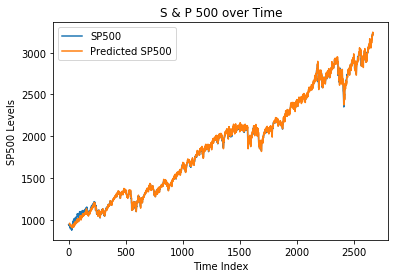

In [0]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[5+look_back:len(data), :] = np.reshape(pred,(-1,1))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data), label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
#plt.show()
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")
#plt.savefig('sp500_plt5_1lay_8h.png')

In [0]:
print(end-start)

36282.21846985817


Text(0.5, 1.0, 'S & P 500 over Time')

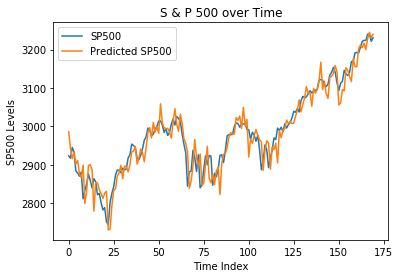

In [0]:
testPredictPlot = np.empty_like(data[len(data)-170:])
testPredictPlot[:, :] = np.reshape(pred,(-1,1))[len(pred)-170:]
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data[len(data)-170:]), label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
#plt.show()
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
#plt.show()
plt.title("S & P 500 over Time")